In [1]:
%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

### Функции

In [2]:
def ackley(x, y):
    return -20*np.exp(-0.2*np.sqrt(0.5*(x**2+y**2))) \
            - np.exp(0.5*(np.cos(2*x*math.pi)+np.cos(2*y*math.pi))) + math.e + 20


def himel(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 -7)**2


def holder(x, y):
    return -abs(np.sin(x)*np.cos(y)*np.exp(abs(1-(np.sqrt(x**2+y**2))/(math.pi))))


def crossInTray(x, y):
    return -0.0001*(abs(np.sin(x)*np.sin(y)*np.exp(abs(100-(x**2+y**2)/(math.pi))))+1)**0.1

### Cамоорганизующийся миграционный алгоритм

In [3]:
class SOMO:
    
    def __init__(self, func, area = (-5, 5), itr = 200, popul = 100, lmbd = 0.2, mutProb = 0.1, steps = 10):
        
        self.func = func            # Исследуемая функция
        self.itr = itr              # Количество итераций
        self.area = area            # Область определения
        self.populQ = popul         # Размер популяции
        self.lmbd = np.array(lmbd)  # Размер шага
        self.mutProb = mutProb      # Вероятность мутации
        self.steps = steps          # Количество шагов
        
        self.popul = np.random.uniform(area[0], area[1], (self.populQ, 2))   # Координаты агентов популяции
        self.populValues = np.array([self.func(*agent) for agent in self.popul]) # Значения функции в точках нахождения агентов
        
        self.bestAgent = self.popul[np.argmin(self.populValues)].copy()
        
        self.populHist = [self.popul.copy()]    # Координаты агентов на каждой итерации
        self.bestHist = [self.bestAgent.copy()] # Лучшая найденная точка на каждой итерации

        
    def execute(self):
        
        for i in range(itr):
            for agentI, agent in enumerate(self.popul):
                
                bestPos = None
                bestVal = None
                
                # Вычисление значения вектора V
                v = np.random.uniform(0, 1, 2)
                v = np.array(list(map(lambda x: 0 if x <= self.mutProb else 1, v)))
                
                for j in range(1, self.steps+1):
                    
                    # Получение новой позиции
                    newPos = agent + lmbd*j*v*(self.bestAgent-agent)
                    newVal = func(*newPos)
                    
                    # Проверка нахождения агента в пределах исследуемой области
                    if newPos[0] < area[0]:
                        newPos[0] = area[0]
                    if newPos[0] > area[1]:
                        newPos[0] = area[1]
                    if newPos[1] < area[0]:
                        newPos[1] = area[0]
                    if newPos[1] > area[1]:
                        newPos[1] = area[1]
                    
                    # Поиск лучшей позиции
                    if bestVal == None or newVal < bestVal:
                        bestPos = newPos
                        bestVal = newVal
                
                # Обновление позиции агента и значения функции в данной точке
                self.popul[agentI] = bestPos
                self.populValues[agentI] = bestVal
            
            # Обновление лучшего агента
            probBest = self.popul[np.argmin(self.populValues)].copy()
            if func(*probBest) < func(*self.bestAgent):
                self.bestAgent = probBest
            
            # Добавление нового положения агентов и текущего лучшего положения
            self.populHist.append(self.popul.copy())
            self.bestHist.append(self.bestAgent.copy())


### Функция Экли

Минимум функции: 0.0
Найденный минимум: 0.00552


<IPython.core.display.Javascript object>


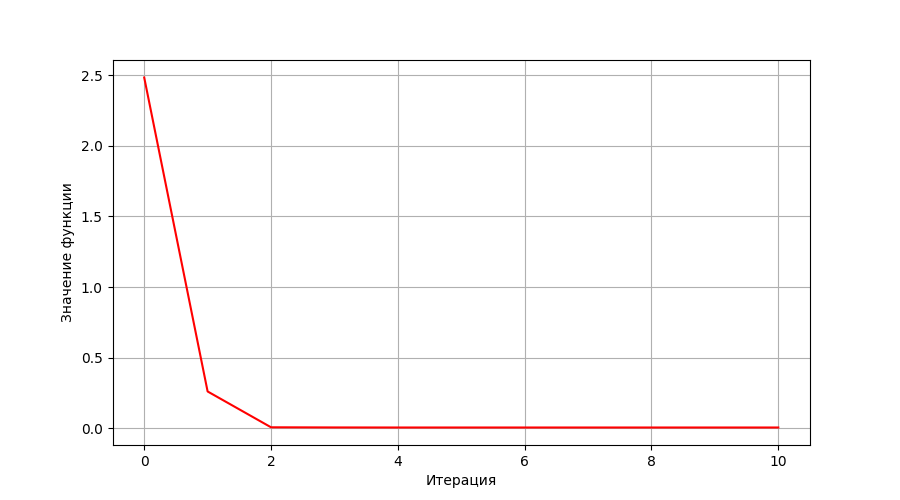

In [6]:
func = ackley
area = (-5, 5)
itr = 10
popul = 50
lmbd = 0.1
mutProb = 0.1
steps = 10

somo = SOMO(func, area, itr, popul, lmbd, mutProb, steps)
somo.execute()
    
populs = [list(map(lambda x: list(x), popul)) for popul in somo.populHist]
bests = [func(*b) for b in somo.bestHist]

print(f'Минимум функции: 0.0\nНайденный минимум: {round(bests[-1], 5)}')

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot()

ax.plot(bests, color='red', linewidth=1.5)
ax.set_xlabel('Итерация')
ax.set_ylabel('Значение функции')
ax.grid()


<IPython.core.display.Javascript object>


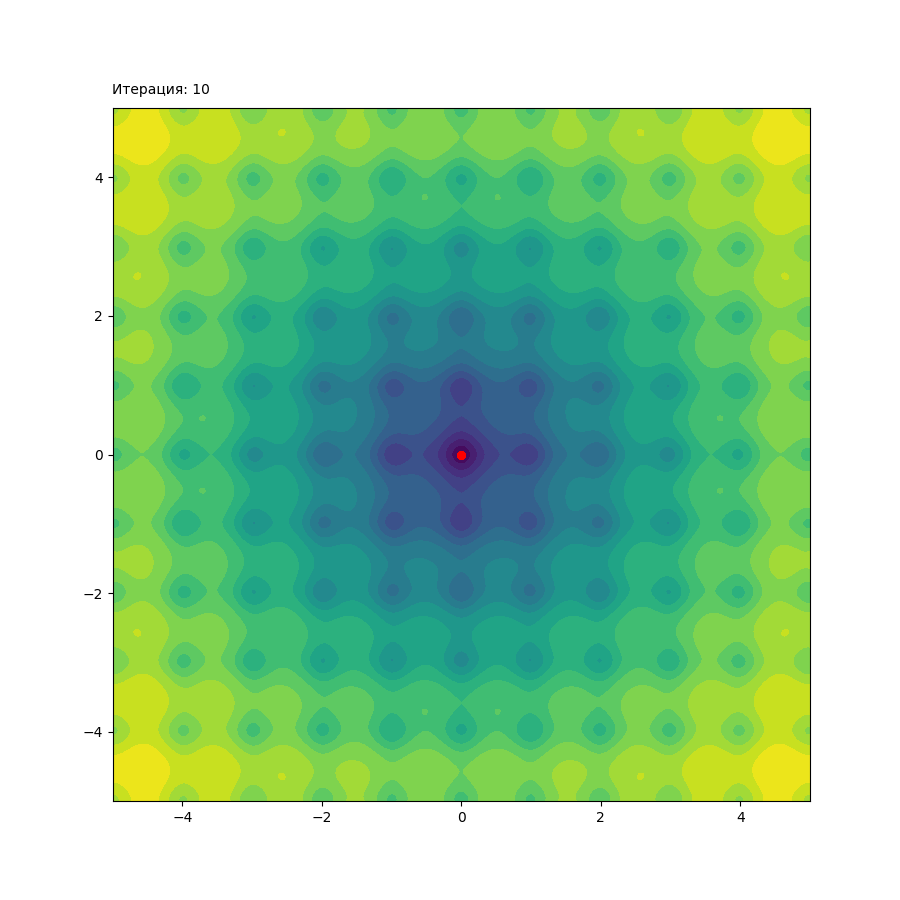

In [7]:
delta = 0.01
x = np.arange(-5, 5, delta)
y = np.arange(-5, 5, delta)
X, Y = np.meshgrid(x, y)
Z = ackley(X, Y)


figA = plt.figure(figsize=(9, 9))
axA = figA.add_subplot()

plt.xlim(-5, 5)
plt.ylim(-5, 5)

axA.contourf(X, Y, Z, levels = 20)

scat = axA.scatter([], [], c='red', linewidths=0.1)
temp = axA.text(-5, 5.2, '')
    
def animate(i):
    temp.set_text('Итерация: ' + str(i))
    scat.set_offsets(populs[i])
    
anim1 = FuncAnimation(figA, animate, frames=len(populs), interval=1000, repeat=False)

### Функция Химмельблау

Минимум функции: 0.0
Найденный минимум: 0.0


<IPython.core.display.Javascript object>


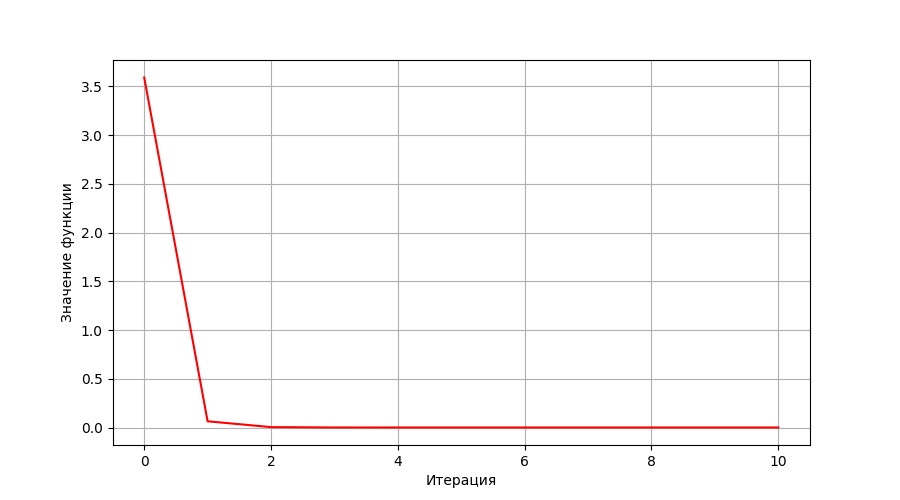

In [8]:
func = himel
area = (-5, 5)
itr = 10
popul = 50
lmbd = 0.3
mutProb = 0.1
steps = 10

somo = SOMO(func, area, itr, popul, lmbd, mutProb, steps)
somo.execute()
    
populs = [list(map(lambda x: list(x), popul)) for popul in somo.populHist]
bests = [func(*b) for b in somo.bestHist]

print(f'Минимум функции: 0.0\nНайденный минимум: {round(bests[-1], 4)}')

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot()

ax.plot(bests, color='red', linewidth=1.5)
ax.set_xlabel('Итерация')
ax.set_ylabel('Значение функции')
ax.grid()

In [9]:
print(f'Минимум функции: 0.0')
print(f'\nТочки минимумов:')
print('f(3,2) = 0')
print('f(-2,805118, 3,131312) = 0')
print('f(-3,779310, -3,283186) = 0')
print('f(3,584428, -1,848126) = 0')
print(f'\nНачальные координаты агентов популяции:\n')
for p in populs[0]:
    print(p)
print('\n\n')

for i in range(itr):
    print(f'Итерация: {i} Значение функции: {round(bests[i], 3)}')

print(f'\n\nКонечные координаты агентов популяции:\n')
for p in populs[-1]:
    print(p)
print(f'\n\nНайденный минимум: {round(bests[-1], 5)}')

Минимум функции: 0.0

Точки минимумов:
f(3,2) = 0
f(-2,805118, 3,131312) = 0
f(-3,779310, -3,283186) = 0
f(3,584428, -1,848126) = 0

Начальные координаты агентов популяции:

[4.91616818974509, 0.072921317499695]
[4.490531101698323, 4.265456210935826]
[-0.4856990091325084, 0.32397845711394346]
[-2.8301052328329934, 0.7701657522302128]
[-3.8114315708390203, -0.2586989646391409]
[4.549915697189936, -3.585523673004828]
[0.43168693274347625, 2.488931093148274]
[-2.4480608542185003, -1.9948491987705164]
[-2.497821568988128, -3.1450932370700624]
[2.120810083123038, -3.2807200687535545]
[-0.05814627429824082, -2.525898503594528]
[-2.129236702935624, 3.217120724518894]
[-0.2823074274527704, 4.933263694621488]
[-4.52452981054357, -3.2160551391021333]
[-1.125804440453153, 4.964268365991252]
[3.638101436731665, -0.4945990531907736]
[-4.131915028128858, 4.230680328011479]
[-1.7382788920900047, 4.423817017374226]
[-0.687650252300056, 3.949419835127438]
[-4.405670434411883, -3.6461368909901726]
[0.24

<IPython.core.display.Javascript object>


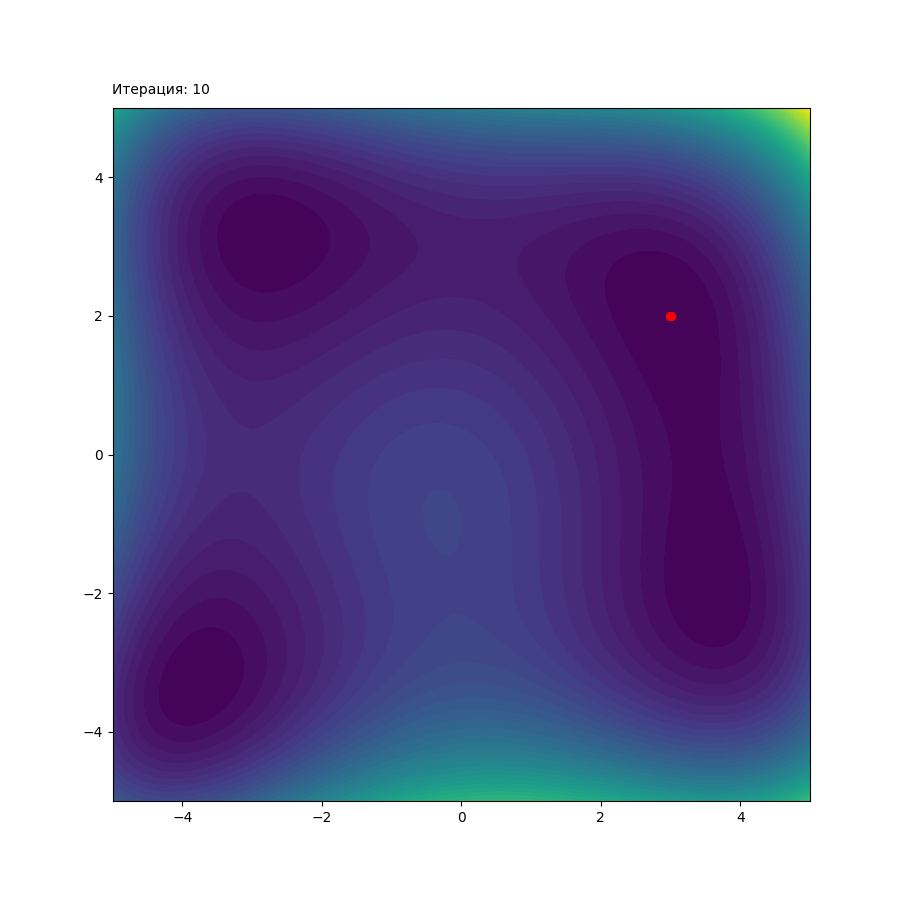

In [10]:
delta = 0.01
x = np.arange(-5, 5, delta)
y = np.arange(-5, 5, delta)
X, Y = np.meshgrid(x, y)
Z = himel(X, Y)


figA = plt.figure(figsize=(9, 9))
axA = figA.add_subplot()

plt.xlim(-5, 5)
plt.ylim(-5, 5)

axA.contourf(X, Y, Z, levels = 50)

scat = axA.scatter([], [], c='red', linewidths=0.1)
temp = axA.text(-5, 5.2, '')

def animate(i):
    temp.set_text('Итерация: ' + str(i))
    scat.set_offsets(populs[i])
    
anim = FuncAnimation(figA, animate, frames=len(populs), interval=1000, repeat=False)

### Табличная функция Хольдера

Минимум функции: -19.2085
Найденный минимум: -19.208502568


<IPython.core.display.Javascript object>


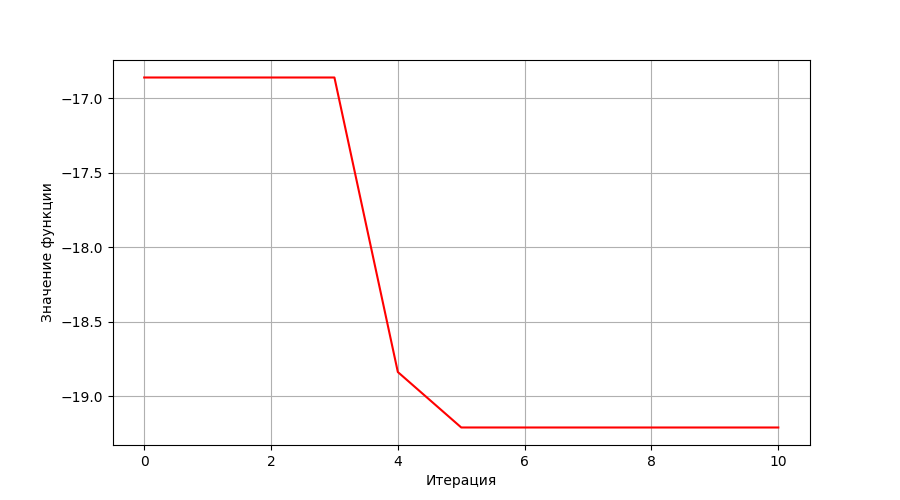

In [11]:
func = holder
area = (-9.7, 9.7)
itr = 10
popul = 50
lmbd = 0.3
mutProb = 0.1
steps = 10

somo = SOMO(func, area, itr, popul, lmbd, mutProb, steps)
somo.execute()
    
populs = [list(map(lambda x: list(x), popul)) for popul in somo.populHist]
bests = [func(*b) for b in somo.bestHist]

print(f'Минимум функции: -19.2085\nНайденный минимум: {round(bests[-1], 9)}')

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot()

ax.plot(bests, color='red', linewidth=1.5)
ax.set_xlabel('Итерация')
ax.set_ylabel('Значение функции')
ax.grid()

<IPython.core.display.Javascript object>


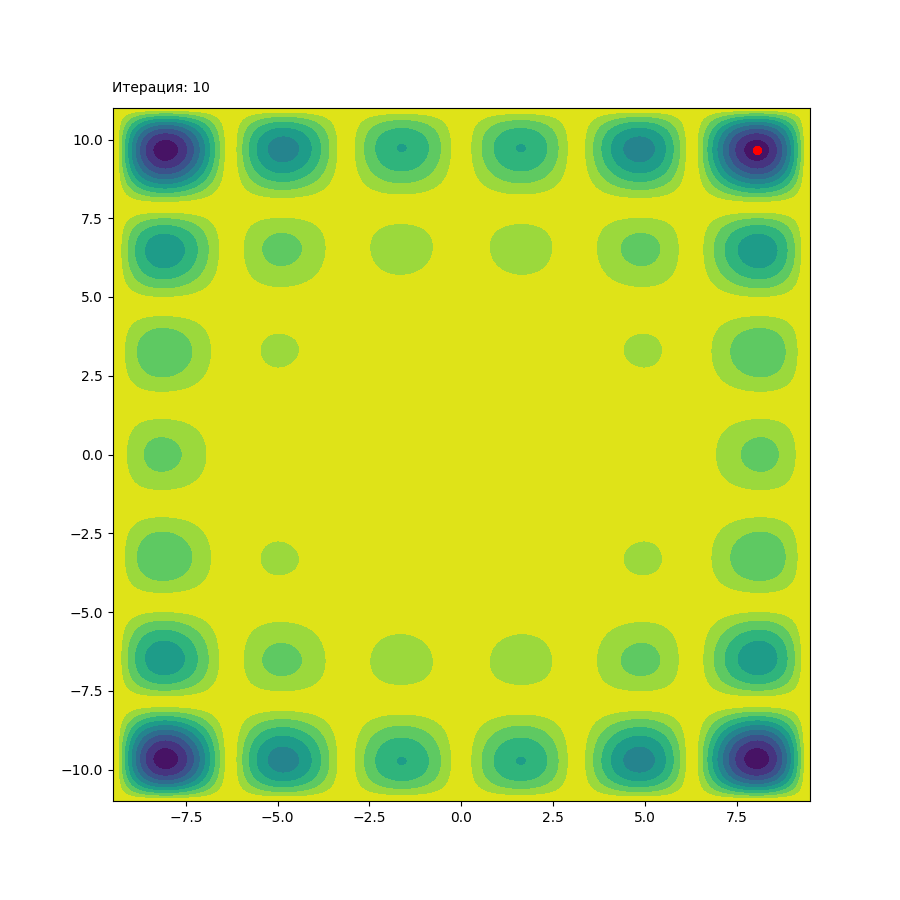

In [13]:
delta = 0.01
x = np.arange(-9.5, 9.5, delta)
y = np.arange(-11, 11, delta)
X, Y = np.meshgrid(x, y)
Z = holder(X, Y)


figA = plt.figure(figsize=(9, 9))
axA = figA.add_subplot()

plt.xlim(-9.5, 9.5)
plt.ylim(-11, 11)

axA.contourf(X, Y, Z, levels = 10)

scat = axA.scatter([], [], c='red', linewidths=0.1)
temp = axA.text(-9.5, 11.5, '')

def animate(i):
    temp.set_text('Итерация: ' + str(i))
    scat.set_offsets(populs[i])
    
anim = FuncAnimation(figA, animate, frames=len(populs), interval=1000, repeat=False)

### Функция "крест на подносе"

Минимум функции: -2.06261
Найденный минимум: -1.996665151


<IPython.core.display.Javascript object>


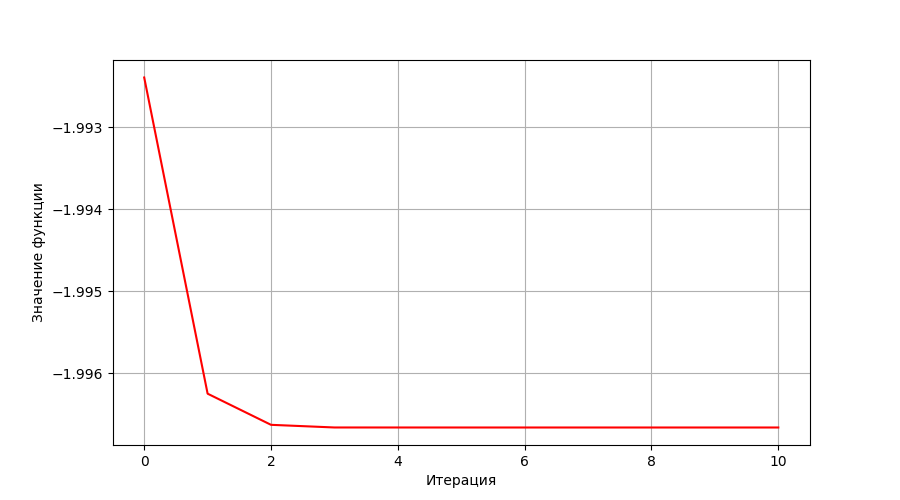

In [14]:
func = crossInTray
area = (-9, 9)
itr = 10
popul = 50
lmbd = 0.3
mutProb = 0.1
steps = 10

somo = SOMO(func, area, itr, popul, lmbd, mutProb, steps)
somo.execute()
    
populs = [list(map(lambda x: list(x), popul)) for popul in somo.populHist]
bests = [func(*b) for b in somo.bestHist]

print(f'Минимум функции: -2.06261\nНайденный минимум: {round(bests[-1], 9)}')

fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot()

ax.plot(bests, color='red', linewidth=1.5)
ax.set_xlabel('Итерация')
ax.set_ylabel('Значение функции')
ax.grid()

<IPython.core.display.Javascript object>


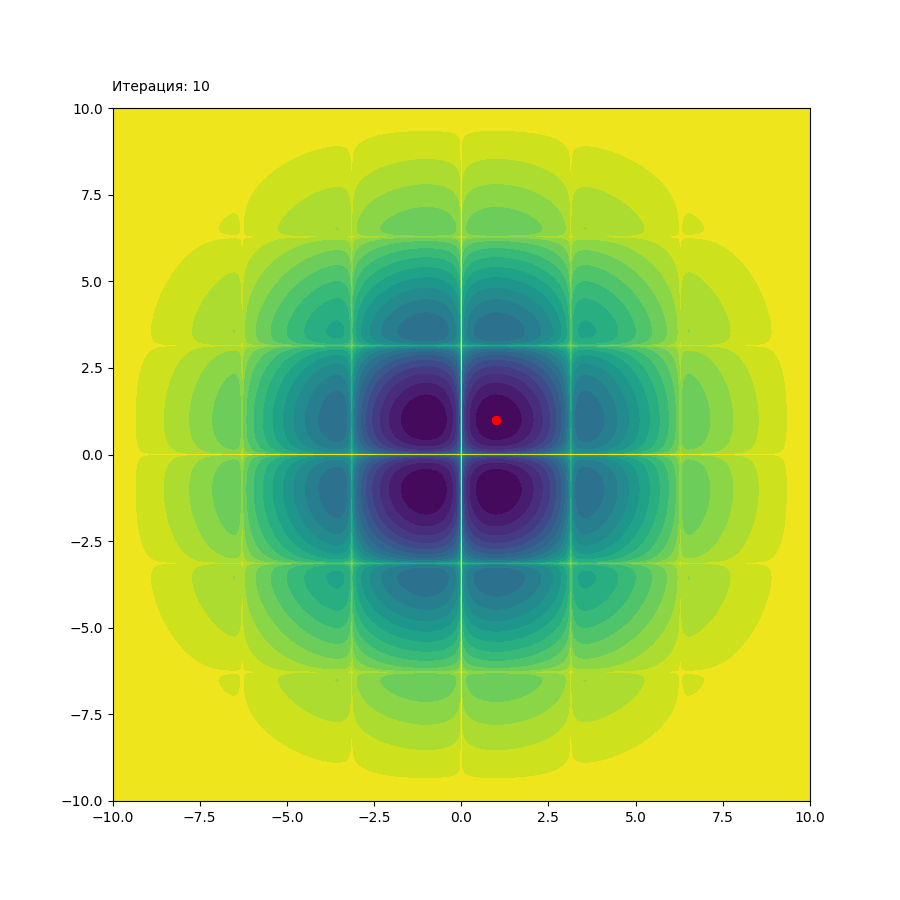

In [15]:
delta = 0.01
x = np.arange(-10, 10, delta)
y = np.arange(-10, 10, delta)
X, Y = np.meshgrid(x, y)
Z = crossInTray(X, Y)

figA = plt.figure(figsize=(9, 9))
axA = figA.add_subplot()

plt.xlim(-10, 10)
plt.ylim(-10, 10)

axA.contourf(X, Y, Z, levels = 20)

scat = axA.scatter([], [], c='red', linewidths=0.1)
temp = axA.text(-10, 10.5, '')

def animate(i):
    temp.set_text('Итерация: ' + str(i))
    scat.set_offsets(populs[i])
    
anim = FuncAnimation(figA, animate, frames=len(populs), interval=1000, repeat=False)

In [ ]:
%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Исследуемая функция
def himel(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 -7)**2


# Самоорганизующийся миграционный алгоритм
class SOMO:
    
    def __init__(self, func, area = (-5, 5), itr = 200, popul = 100, lmbd = 0.2, mutProb = 0.1, steps = 10):
        
        self.func = func            # Исследуемая функция
        self.itr = itr              # Количество итераций
        self.area = area            # Область определения
        self.populQ = popul         # Размер популяции
        self.lmbd = np.array(lmbd)  # Размер шага
        self.mutProb = mutProb      # Вероятность мутации
        self.steps = steps          # Количество шагов
        
        self.popul = np.random.uniform(area[0], area[1], (self.populQ, 2))       # Координаты агентов популяции
        self.populValues = np.array([self.func(*agent) for agent in self.popul]) # Значения функции в точках нахождения агентов
        
        self.bestAgent = self.popul[np.argmin(self.populValues)].copy() # Лучший агент
        
        self.populHist = [self.popul.copy()]    # Координаты агентов на каждой итерации
        self.bestHist = [self.bestAgent.copy()] # Лучшая найденная точка на каждой итерации

        
    def execute(self):
        
        for i in range(itr):
            for agentI, agent in enumerate(self.popul):
                
                bestPos = None
                bestVal = None
                
                # Вычисление значения вектора V
                v = np.random.uniform(0, 1, 2)
                v = np.array(list(map(lambda x: 0 if x <= self.mutProb else 1, v)))
                
                for j in range(1, self.steps+1):
                    
                    # Получение новой позиции
                    newPos = agent + lmbd*j*v*(self.bestAgent-agent)
                    newVal = func(*newPos)
                    
                    # Проверка нахождения агента в пределах исследуемой области
                    if newPos[0] < area[0]:
                        newPos[0] = area[0]
                    if newPos[0] > area[1]:
                        newPos[0] = area[1]
                    if newPos[1] < area[0]:
                        newPos[1] = area[0]
                    if newPos[1] > area[1]:
                        newPos[1] = area[1]
                    
                    # Поиск лучшей позиции
                    if bestVal == None or newVal < bestVal:
                        bestPos = newPos
                        bestVal = newVal
                
                # Обновление позиции агента и значения функции в данной точке
                self.popul[agentI] = bestPos
                self.populValues[agentI] = bestVal
            
            # Обновление лучшего агента
            probBest = self.popul[np.argmin(self.populValues)].copy()
            if func(*probBest) < func(*self.bestAgent):
                self.bestAgent = probBest
            
            # Добавление нового положения агентов и текущего лучшего положения
            self.populHist.append(self.popul.copy())
            self.bestHist.append(self.bestAgent.copy())

            
# Инициализация параметров
func = himel
area = (-5, 5)
itr = 10
popul = 20
lmbd = 0.3
mutProb = 0.1
steps = 10

# Запуск алгоритма
somo = SOMO(func, area, itr, popul, lmbd, mutProb, steps)
somo.execute()

# Выходные данные
populs = [list(map(lambda x: list(x), popul)) for popul in somo.populHist]
bests = [func(*b) for b in somo.bestHist]


# Вывод результатов
print(f'Минимум функции: 0.0')
print(f'\nТочки минимумов:')
print('f(3,2) = 0')
print('f(-2,805118, 3,131312) = 0')
print('f(-3,779310, -3,283186) = 0')
print('f(3,584428, -1,848126) = 0')
print(f'\nНачальные координаты агентов популяции:\n')
for p in populs[0]:
    print(p)
print('\n\n')

for i in range(itr):
    print(f'Итерация: {i} Значение функции: {round(bests[i], 3)}')

print(f'\n\nКонечные координаты агентов популяции:\n')
for p in populs[-1]:
    print(p)
print(f'\n\nНайденный минимум: {round(bests[-1], 9)}')


# График
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot()

ax.plot(bests, color='red', linewidth=1.5)
ax.set_xlabel('Итерация')
ax.set_ylabel('Значение функции')
ax.grid()


# Анимация
delta = 0.01
x = np.arange(-5, 5, delta)
y = np.arange(-5, 5, delta)
X, Y = np.meshgrid(x, y)
Z = himel(X, Y)

figA = plt.figure(figsize=(9, 9))
axA = figA.add_subplot()

plt.xlim(-5, 5)
plt.ylim(-5, 5)

axA.contourf(X, Y, Z, levels = 50)

scat = axA.scatter([], [], c='red', linewidths=0.1)
temp = axA.text(-5, 5.2, '')

def animate(i):
    temp.set_text('Итерация: ' + str(i))
    scat.set_offsets(populs[i])
    
anim = FuncAnimation(figA, animate, frames=len(populs), interval=1000, repeat=False)